In [ ]:
import numpy as np
import seaborn as sb
import matplotlib.pyplot as mp
import pandas as pd

In [ ]:
df = pd.read_csv("BostonHousing.csv")
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


Medv is price of house which we want to predict on basis of other datas


In [ ]:
df.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

calculating corellation just to know relation between values. Here you can see that :

corellation coeff of data with respect to medv:
---> positive in case of medv(obviouslyy!!) rm, zn,b,dis,chas
---> -ve in case of others

we need to use data of both +ve corellation and -ve corellation

In [ ]:
corr_matrix = df.corr()
corr_matrix['medv'].sort_values(ascending=False)

medv       1.000000
rm         0.695360
zn         0.360445
b          0.333461
dis        0.249929
chas       0.175260
age       -0.376955
rad       -0.381626
crim      -0.388305
nox       -0.427321
tax       -0.468536
indus     -0.483725
ptratio   -0.507787
lstat     -0.737663
Name: medv, dtype: float64

Heat map tells about corellation:
White colour indicates positive corellation and red colour indicates -ve corellation

for prediction of medv we want values which have +ve corellation coeff. => clodse to white colour

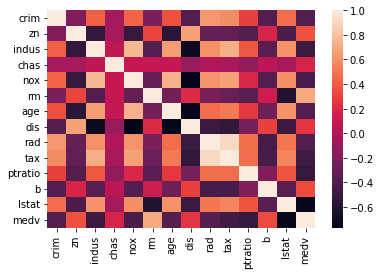

In [ ]:
# plotting and displaying correlation heatmap

dataplot = sb.heatmap(df.corr(), annot=False)
mp.show()

We need to drop dis, chas and b because:
1. see corellation matrix code done before
2.Although corellation of dis, chas and b is positive 
from heat map we can conclude that their values seems to be near to red colour
=> we should not include them 
=> we should drop them

we need to use data of both +ve corellation and -ve corellation
 **BUT 
Drop values close to 0** 

In [ ]:
df.drop(["dis","chas","b"],axis=1,inplace=True)

we are printing 100th row of dataframe

In [ ]:
df.iloc[100]

crim         0.14866
zn           0.00000
indus        8.56000
nox          0.52000
rm           6.72700
age         79.90000
rad          5.00000
tax        384.00000
ptratio     20.90000
lstat        9.42000
medv        27.50000
Name: 100, dtype: float64

In [ ]:
print(df.describe())

             crim          zn       indus         nox          rm         age  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.554695    6.284634   68.574901   
std      8.601545   23.322453    6.860353    0.115878    0.702617   28.148861   
min      0.006320    0.000000    0.460000    0.385000    3.561000    2.900000   
25%      0.082045    0.000000    5.190000    0.449000    5.885500   45.025000   
50%      0.256510    0.000000    9.690000    0.538000    6.208500   77.500000   
75%      3.677083   12.500000   18.100000    0.624000    6.623500   94.075000   
max     88.976200  100.000000   27.740000    0.871000    8.780000  100.000000   

              rad         tax     ptratio       lstat        medv  
count  506.000000  506.000000  506.000000  506.000000  506.000000  
mean     9.549407  408.237154   18.455534   12.653063   22.532806  
std      8.707259  168.537116    2.164946    7.141062    9.197104 

# Now we need to scale databecause:
May be range of data might be too large
so it becomes difficult for computation
hence do one thing, scale the values so that computation and calculations will be easy

In [ ]:
# Split the data into training and testing sets

from sklearn.model_selection import train_test_split

X=df.drop('medv', axis=1) # All data expect medv column
Y= df['medv'] # Medv column

# test size 0.2 indicates:
#80% is training data
#20% is testing data

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2 )


scalling the values...

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Now we are fitting the data into linear regression algorithm

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
#calculating the mean squared error

from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

MSE: 27.89733682381939


In [ ]:
# make predictions on the test set
# compute the RMSE score
# Calculate rms error (Root mean square error)
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test_scaled)

Root_mean_sqd_error = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:", Root_mean_sqd_error ) 

RMSE: 5.281792955410065


egression model. R2 measures the proportion of the variance in the dependent variable (y) that is explained by the independent variable(s) (x) in the regression model. It is also called the coefficient of determination.

An R2 score of 1.0 indicates a perfect fit of the regression model to the data, meaning that all of the variance in the dependent variable is explained by the independent variable(s). A score of 0.0 indicates that the regression model does not explain any of the variance in the dependent variable, and a negative R2 score indicates that the model fits the data worse than a horizontal line.

**R2 score ranges between 0 and 1, with higher values indicating a better fit of the model to the data. However, a high R2 score does not necessarily mean that the model is a good predictor of the dependent variable, as it is possible to overfit a model to the training data. Therefore, it is important to use additional metrics and techniques to evaluate the performance of the model.**

In [ ]:
#r square score
#ytest-dependent  ypredicted-independent
from sklearn.metrics import r2_score
R2 = r2_score(y_test,y_pred)
print("R2_score:",R2)

R2_score: 0.452811409854581


In linear regression, the independent variable (also called the predictor variable or input variable) is the variable that is being used to predict the value of the dependent variable (also called the response variable or output variable). The dependent variable is the variable that is being predicted.

For example, suppose we want to predict a person's salary based on their years of work experience. In this case, the independent variable is the number of years of work experience, and the dependent variable is the salary. We could use a linear regression model to estimate the relationship between these two variables, which would allow us to predict someone's salary based on their years of work experience.

Another example could be predicting the price of a house based on its size. Here, the independent variable would be the size of the house (in square feet) and the dependent variable would be the price of the house. We could use a linear regression model to estimate the relationship between these two variables, which would allow us to predict the price of a house based on its size.

In general, the independent variable is the variable that is controlled or manipulated in order to observe its effect on the dependent variable. The dependent variable, on the other hand, is the variable that is affected or influenced by changes in the independent variable.

Now we need to give some custom inputs and check weather our model predicts correct answer or not...

In [ ]:
# create a new DataFrame with the custom input values

custom_input = pd.DataFrame({
    'crim': [0.147],
    'zn': [0],
    'indus': [8.50],
    'nox': [0.53],
    'rm': [6.728],
    'age': [79.5],
    'rad': [5],
    'tax': [385],
    'ptratio':[20.9],
    
    'lstat':[9.42]
})

Now printing predicted values

In [ ]:
# scale the input values using the same scaling parameters as the training set
custom_input_scaled = scaler.transform(custom_input)

# make a prediction using the trained model
prediction = model.predict(custom_input_scaled)

# print the predicted value
print("Predicted value:", prediction[0])

Predicted value: 23.649760433698514
